In [1]:
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
# UNCERTAINTY WITH ERRORS 0.1, this file contains also realization 00
# folder_path = '/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_12_04_2024/Retrieval_Uncertainty_same_error_VSDs_BCN12thApril2024' 
# UNCERTAINTY WITH RIGHT ERRORS
# folder_path = '/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_12_04_2024/Retrieval_Uncertainty_VSDs_BCN12thApril2024'

# UNCERTAINTY WITH SPHERE MODEL AND ERRORS 0.1
folder_path = '/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_12_04_2024/Retrieval_Uncertainty_same_error_sphere_model_VSDs_BCN12thApril2024'
# UNCERTAINTY WITH SPHERE MODEL AND RIGHT ERRORS
# folder_path = '/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_12_04_2024/Retrieval_Uncertainty_right_error_sphere_model_VSDs_BCN12thApril2024'

# LILLE 30th MAY 2020
folder_path = '/Users/dada/Desktop/TFM/EARLINET_Database/LILLE_30_05_2020/Retrieval_Uncertainty/VSDs_Lille30thMay2020'



file_paths = glob.glob(os.path.join(folder_path, "Realization_**.csv"))

In [3]:
vsd_data = {}
vsd_std_data = {}
radii = {}
for file_path in file_paths:
    data = pd.read_csv(file_path, skiprows=1, header=None)  # Skip the first header row
    vsd_data[os.path.basename(file_path)] = data[1] 
    vsd_std_data[os.path.basename(file_path)] = data[2]    # Store the second column as VSD values
    radii[os.path.basename(file_path)] = data[0]  # Store the first column as radii values

# Separate the file 'Realization_01.csv' for plotting and exclude it from standard deviation calculation
# Realization 01 contains data of the initial configuration with the right errors 
# Realization 00 contains data of the initial configuration with errors 0.1
# realization_01_vsd = vsd_data.pop('Realization_01.csv', None)  # Remove and store 'Realization_01.csv' VSD mean values data
# realization_01_vsd_std = vsd_std_data.pop('Realization_01.csv', None)  # Remove and store 'Realization_01.csv' data VSD STD DATA
realization_00_vsd = vsd_data.pop('Realization_00.csv', None)
realization_00_vsd_std = vsd_std_data.pop('Realization_00.csv', None)

# Combine the remaining VSD data into a single DataFrame for standard deviation calculation
vsd_df = pd.DataFrame(vsd_data)
vsd_std_df = pd.DataFrame(vsd_std_data) 

vsd_std_dev_calculated = vsd_df.std(axis=1)
vsd_mean_calculated = vsd_df.mean(axis=1)

vsd_mean_plus_half = vsd_mean_calculated + (0.5*vsd_std_dev_calculated)
vsd_mean_minus_half = vsd_mean_calculated - (0.5*vsd_std_dev_calculated)

common_radii = next(iter(radii.values())) if len(radii) > 0 else pd.Series([])


#### Plot of the VSD from IS, VSD calculated

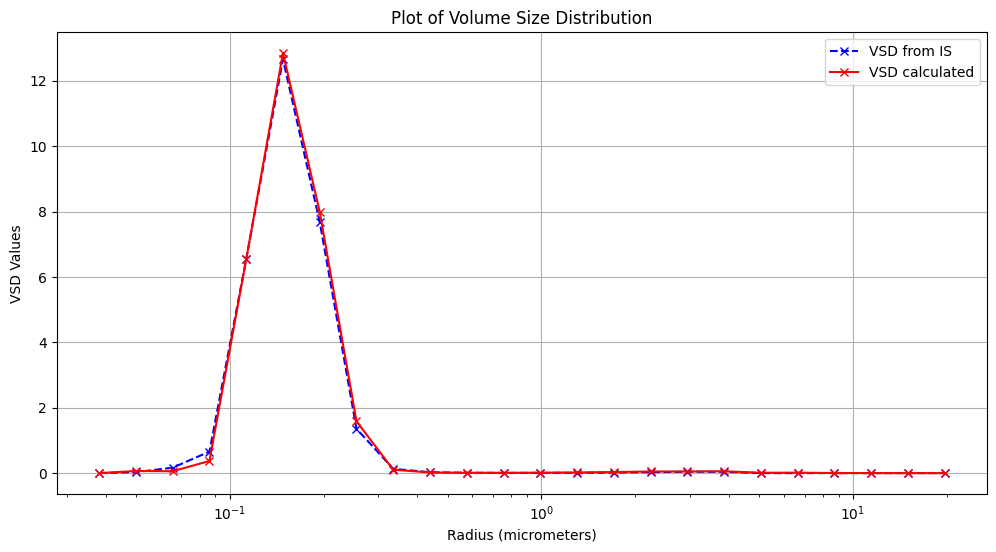

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(common_radii, realization_00_vsd, marker='x', linestyle='--', color='b', label='VSD from IS')
plt.plot(common_radii, vsd_mean_calculated, marker='x', linestyle='-', color='r', label='VSD calculated')
plt.xscale('log')
plt.title('Plot of Volume Size Distribution')
plt.xlabel('Radius (micrometers)')
plt.ylabel('VSD Values')
plt.grid(True)
plt.legend()
plt.show()

#### Plot of the errors

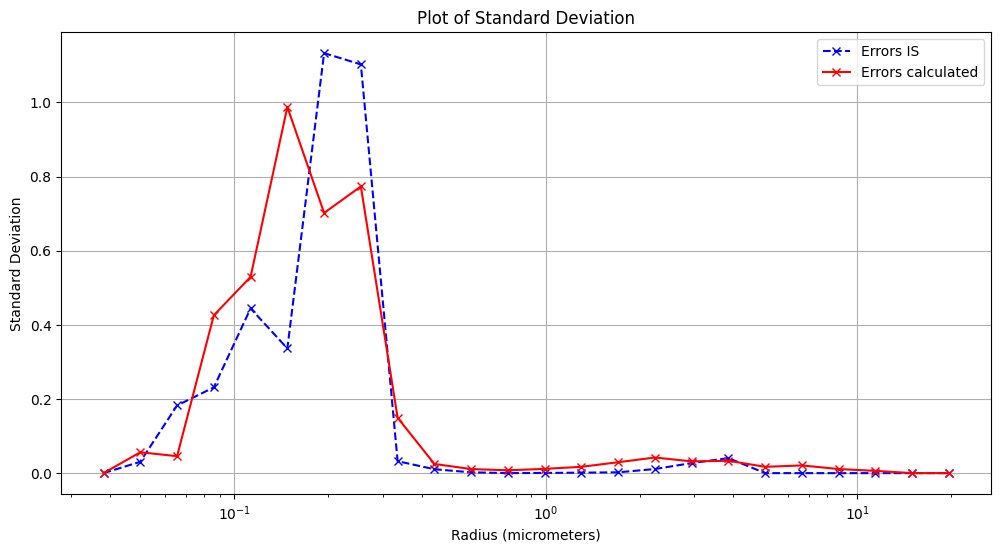

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(common_radii, realization_00_vsd_std, marker='x', linestyle='--', color='b', label='Errors IS')
plt.plot(common_radii, vsd_std_dev_calculated, marker='x', linestyle='-', color='r', label='Errors calculated')
plt.xscale('log')
plt.title('Plot of Standard Deviation')
plt.xlabel('Radius (micrometers)')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.legend()
plt.show()

#### Plot of the VSD from IS, VSD calculated and VSD calculate +- 0.5*STD calculated 

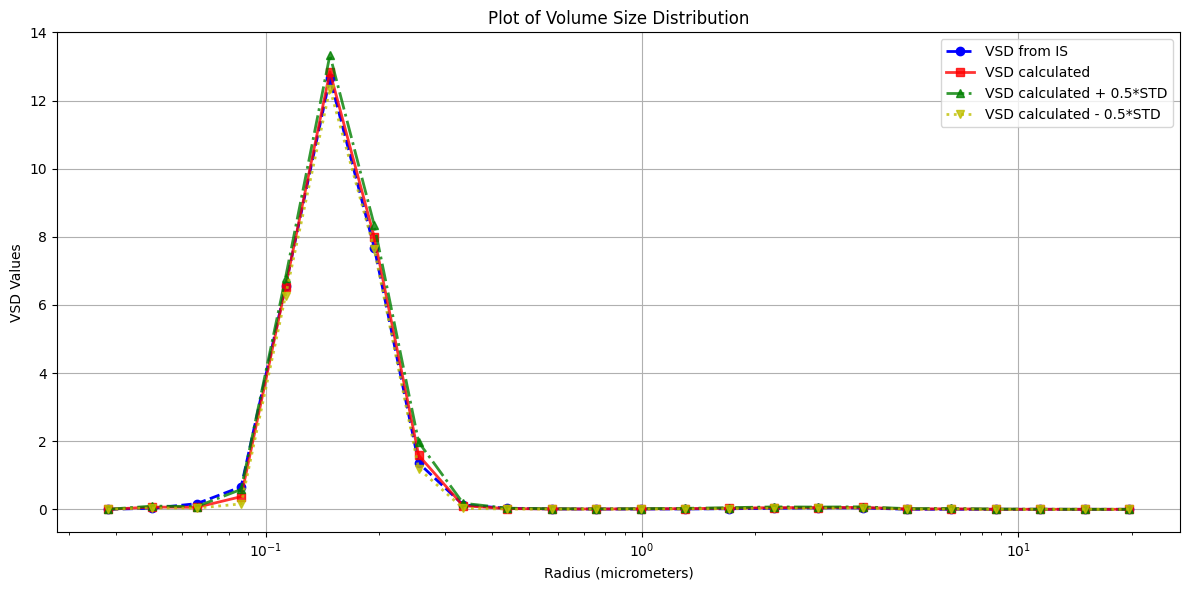

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(common_radii, realization_00_vsd, marker='o', linestyle='--', color='b', linewidth=2, label='VSD from IS')
plt.plot(common_radii, vsd_mean_calculated, marker='s', linestyle='-', color='r', linewidth=2, alpha=0.8, label='VSD calculated')
plt.plot(common_radii, vsd_mean_plus_half, marker='^', linestyle='-.', color='g', linewidth=2, alpha=0.8, label='VSD calculated + 0.5*STD')
plt.plot(common_radii, vsd_mean_minus_half, marker='v', linestyle=':', color='y', linewidth=2, alpha=0.8, label='VSD calculated - 0.5*STD')
plt.xscale('log')
plt.title('Plot of Volume Size Distribution')
plt.xlabel('Radius (micrometers)')
plt.ylabel('VSD Values')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()